\newpage
### Librararies 

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import numpy as np
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import warnings
warnings.filterwarnings('ignore')

### Data Import

In [126]:
chronic_kidney_disease = fetch_ucirepo(id=336) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
df = pd.concat([X,y], axis=1)

### 1. Classification Problem Statement:

- Based on this dataset, the classification problem involves predicting whether a patient has chronic kidney disease (ckd). This is done using a variety of factors, such as age, blood pressure, red blood cell count, and more. The target variable is binary and is denoted ‘class’ (has ckd or not). The predictors are a mix of binary, categorical, and numerical variables, and we will use machine learning to correctly classify each individual.

### 2. Variable Transformation

In [146]:
df.nunique()

age       77
bp        11
sg         6
al         7
su         7
rbc        3
pc         3
pcc        2
ba         2
bgr      146
bu       119
sc        85
sod       35
pot       41
hemo     116
pcv       43
wbcc      90
rbcc      46
htn        2
dm         2
cad        2
appet      2
pe         2
ane        2
class      2
dtype: int64

In [162]:
df.info(max_cols= None)

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     393 non-null    float64
 1   bp      393 non-null    float64
 2   sg      393 non-null    float64
 3   al      393 non-null    float64
 4   su      393 non-null    float64
 5   rbc     393 non-null    float64
 6   pc      393 non-null    float64
 7   pcc     393 non-null    float64
 8   ba      393 non-null    float64
 9   bgr     393 non-null    float64
 10  bu      393 non-null    float64
 11  sc      393 non-null    float64
 12  sod     393 non-null    float64
 13  pot     393 non-null    float64
 14  hemo    393 non-null    float64
 15  pcv     393 non-null    float64
 16  wbcc    393 non-null    float64
 17  rbcc    393 non-null    float64
 18  htn     393 non-null    float64
 19  dm      393 non-null    float64
 20  cad     393 non-null    float64
 21  appet   393 non-null    float64
 22  pe     

In [129]:
#Fixing the dataset by chanding 'ckd\t' to just 'ckd'
df['class'] = df['class'].str.strip()
df['dm'] = df['dm'].str.strip()

In [130]:
columns = ['htn', 'dm', 'cad', 'pe', 'ane']
for column in columns:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

In [131]:
columns = ['rbc','pc']
for column in columns:
    df[column] = df[column].replace({'abnormal': 1, 'normal': 0})

In [132]:
columns = ['pcc','ba']
for column in columns:
    df[column] = df[column].replace({'present': 1, 'notpresent': 0})

In [133]:
df['appet'] = df['appet'].replace({'good': 1, 'poor': 0})
df['class'] = df['class'].replace({'ckd': 1, 'notckd': 0})

### 3. Dataset Overview 

In [134]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
df.shape

(400, 25)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'sg'}>, <Axes: title={'center': 'al'}>,
        <Axes: title={'center': 'su'}>],
       [<Axes: title={'center': 'rbc'}>, <Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'pcc'}>, <Axes: title={'center': 'ba'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'sod'}>, <Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>],
       [<Axes: title={'center': 'pcv'}>,
        <Axes: title={'center': 'wbcc'}>,
        <Axes: title={'center': 'rbcc'}>,
        <Axes: title={'center': 'htn'}>, <Axes: title={'center': 'dm'}>],
       [<Axes: title={'center': 'cad'}>,
        <Axes: title={'center': 'appet'}>,
        <Axes: title={'center': 'pe'}>, <Axes: title={'center': 'ane'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

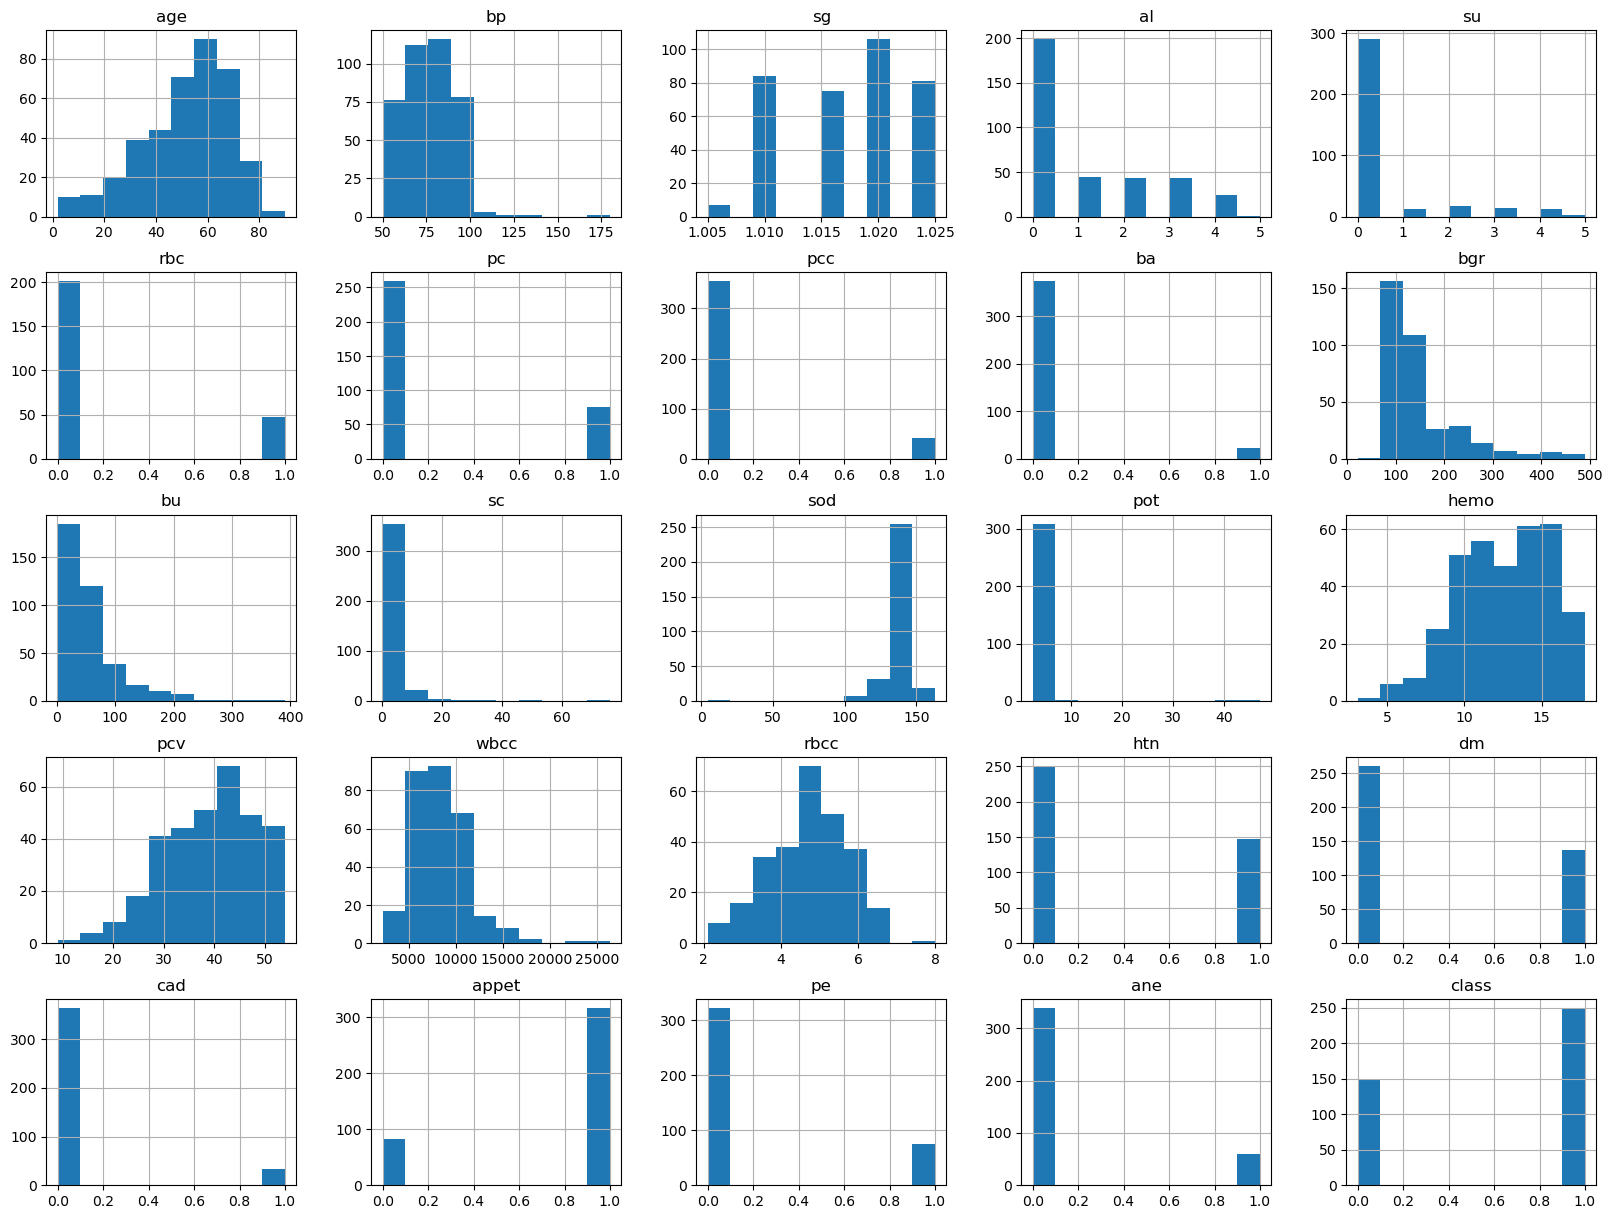

In [137]:
df.hist(figsize=(20, 15))

- The dataset contains 400 observations and 25 variables. Based on the numerical summary, the mean age of the individuals in the dataset is about 51.48, ranging from 2 years old to 90 years old. Each variable (apart from the target variable) contains missing values. For example, there are only 248 observations with a value for 'red blood cells' (rbc). Among the numerical (float64) variables in the dataset are age (age), blood pressure (bp), specific gravity (sg), albumin (al), and several more. Some of the categorical variables include coronary artery disease (cad), appetite (appet), and anemia (ane). Based on the histograms, there appears to be a wide variation of distributions. For example, 'bp' is heavily skewed to the right, while variables like 'age' and 'rbcc' appear to follow a fairly normal distribution with slight skew.

### 4. Variable Association 

In [138]:
corr = df.corr()
class_correlation = corr['class'].drop('class')


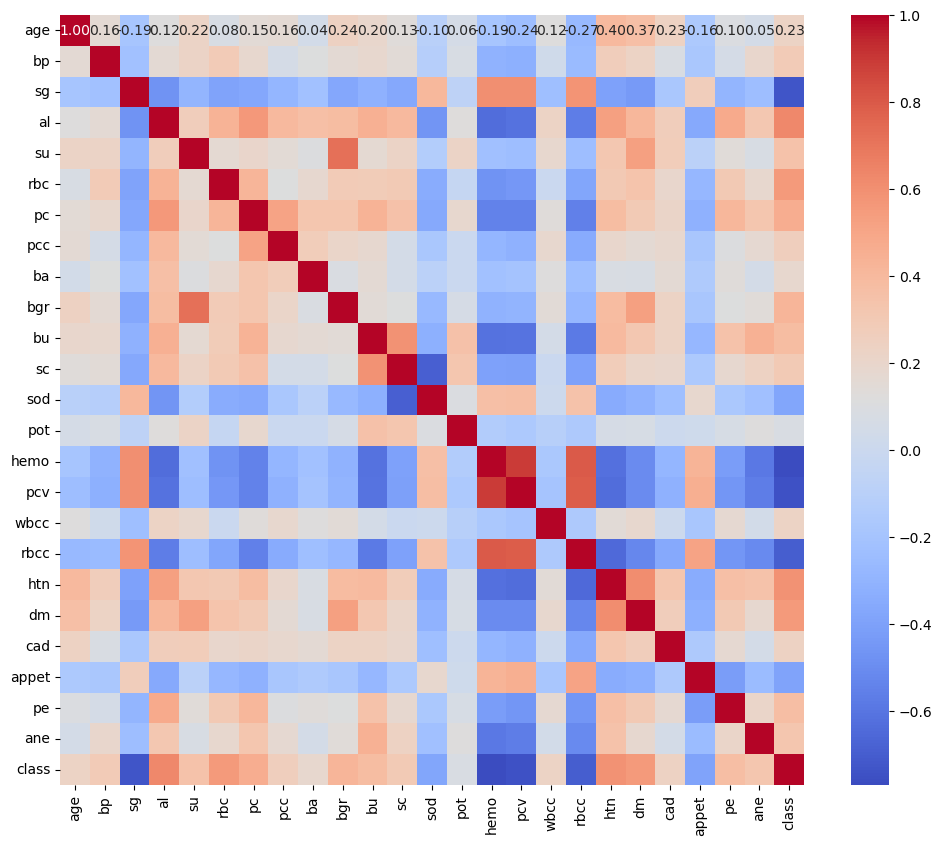

In [139]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

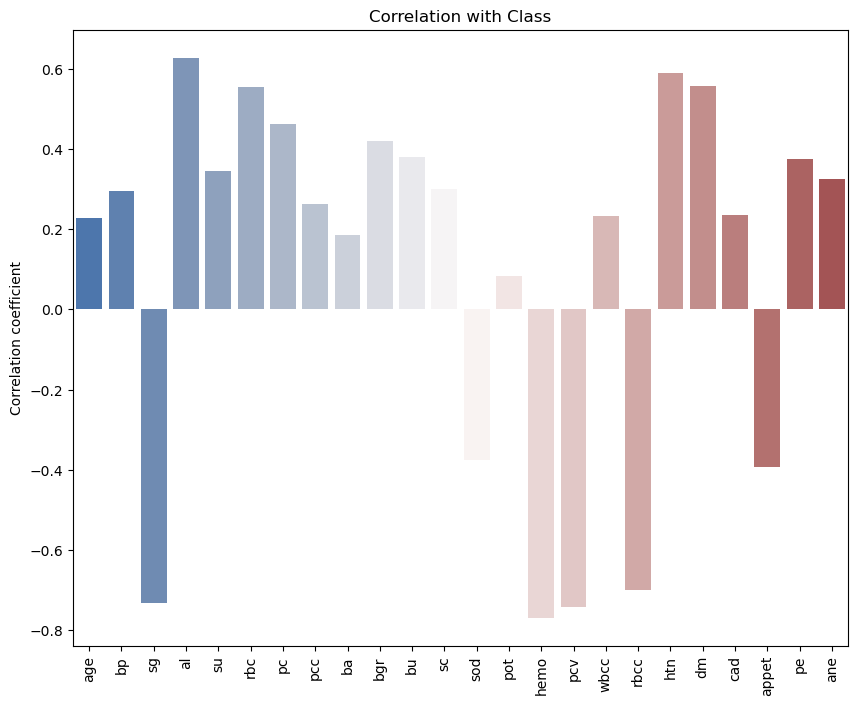

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [140]:
plt.figure(figsize=(10, 8))
sns.barplot(x=class_correlation.index, y=class_correlation.values, palette="vlag")
plt.title('Correlation with Class')
plt.xticks(rotation=90)
plt.ylabel('Correlation coefficient')
plt.show()
plt.figure(figsize=(12, 10))

- The heatmap gives correlation between any two variables. For instance, there seems to be a high correlation (0.80) between hemoglobin (hemo) and red blood cell count (rbcc). This means that if hemoglobin is high, it is likely that red blood cell count is high as well (and vice versa). The bar chart provides correlation between each variable and the target variable 'class.' There is a clear negative correlation between class and specific gravity (sg). This suggests that as specific gravity decreases, the likelihood of chronic kidney disease increases. On the other hand, there is a strong positive correlation between class and hypertension (htn). This means as hypertension increases, so does the likelihood of chronic kidney disease.

### 5. Missing Values Analysis and Handling

In [141]:
df.isnull().sum()


age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [143]:
columns= ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'bu', 'sc']
for column in columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)



In [144]:
df = df.dropna()

### 6. Outlier Analysis

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     393 non-null    float64
 1   bp      393 non-null    float64
 2   sg      393 non-null    float64
 3   al      393 non-null    float64
 4   su      393 non-null    float64
 5   rbc     393 non-null    float64
 6   pc      393 non-null    float64
 7   pcc     393 non-null    float64
 8   ba      393 non-null    float64
 9   bgr     393 non-null    float64
 10  bu      393 non-null    float64
 11  sc      393 non-null    float64
 12  sod     393 non-null    float64
 13  pot     393 non-null    float64
 14  hemo    393 non-null    float64
 15  pcv     393 non-null    float64
 16  wbcc    393 non-null    float64
 17  rbcc    393 non-null    float64
 18  htn     393 non-null    float64
 19  dm      393 non-null    float64
 20  cad     393 non-null    float64
 21  appet   393 non-null    float64
 22  pe     

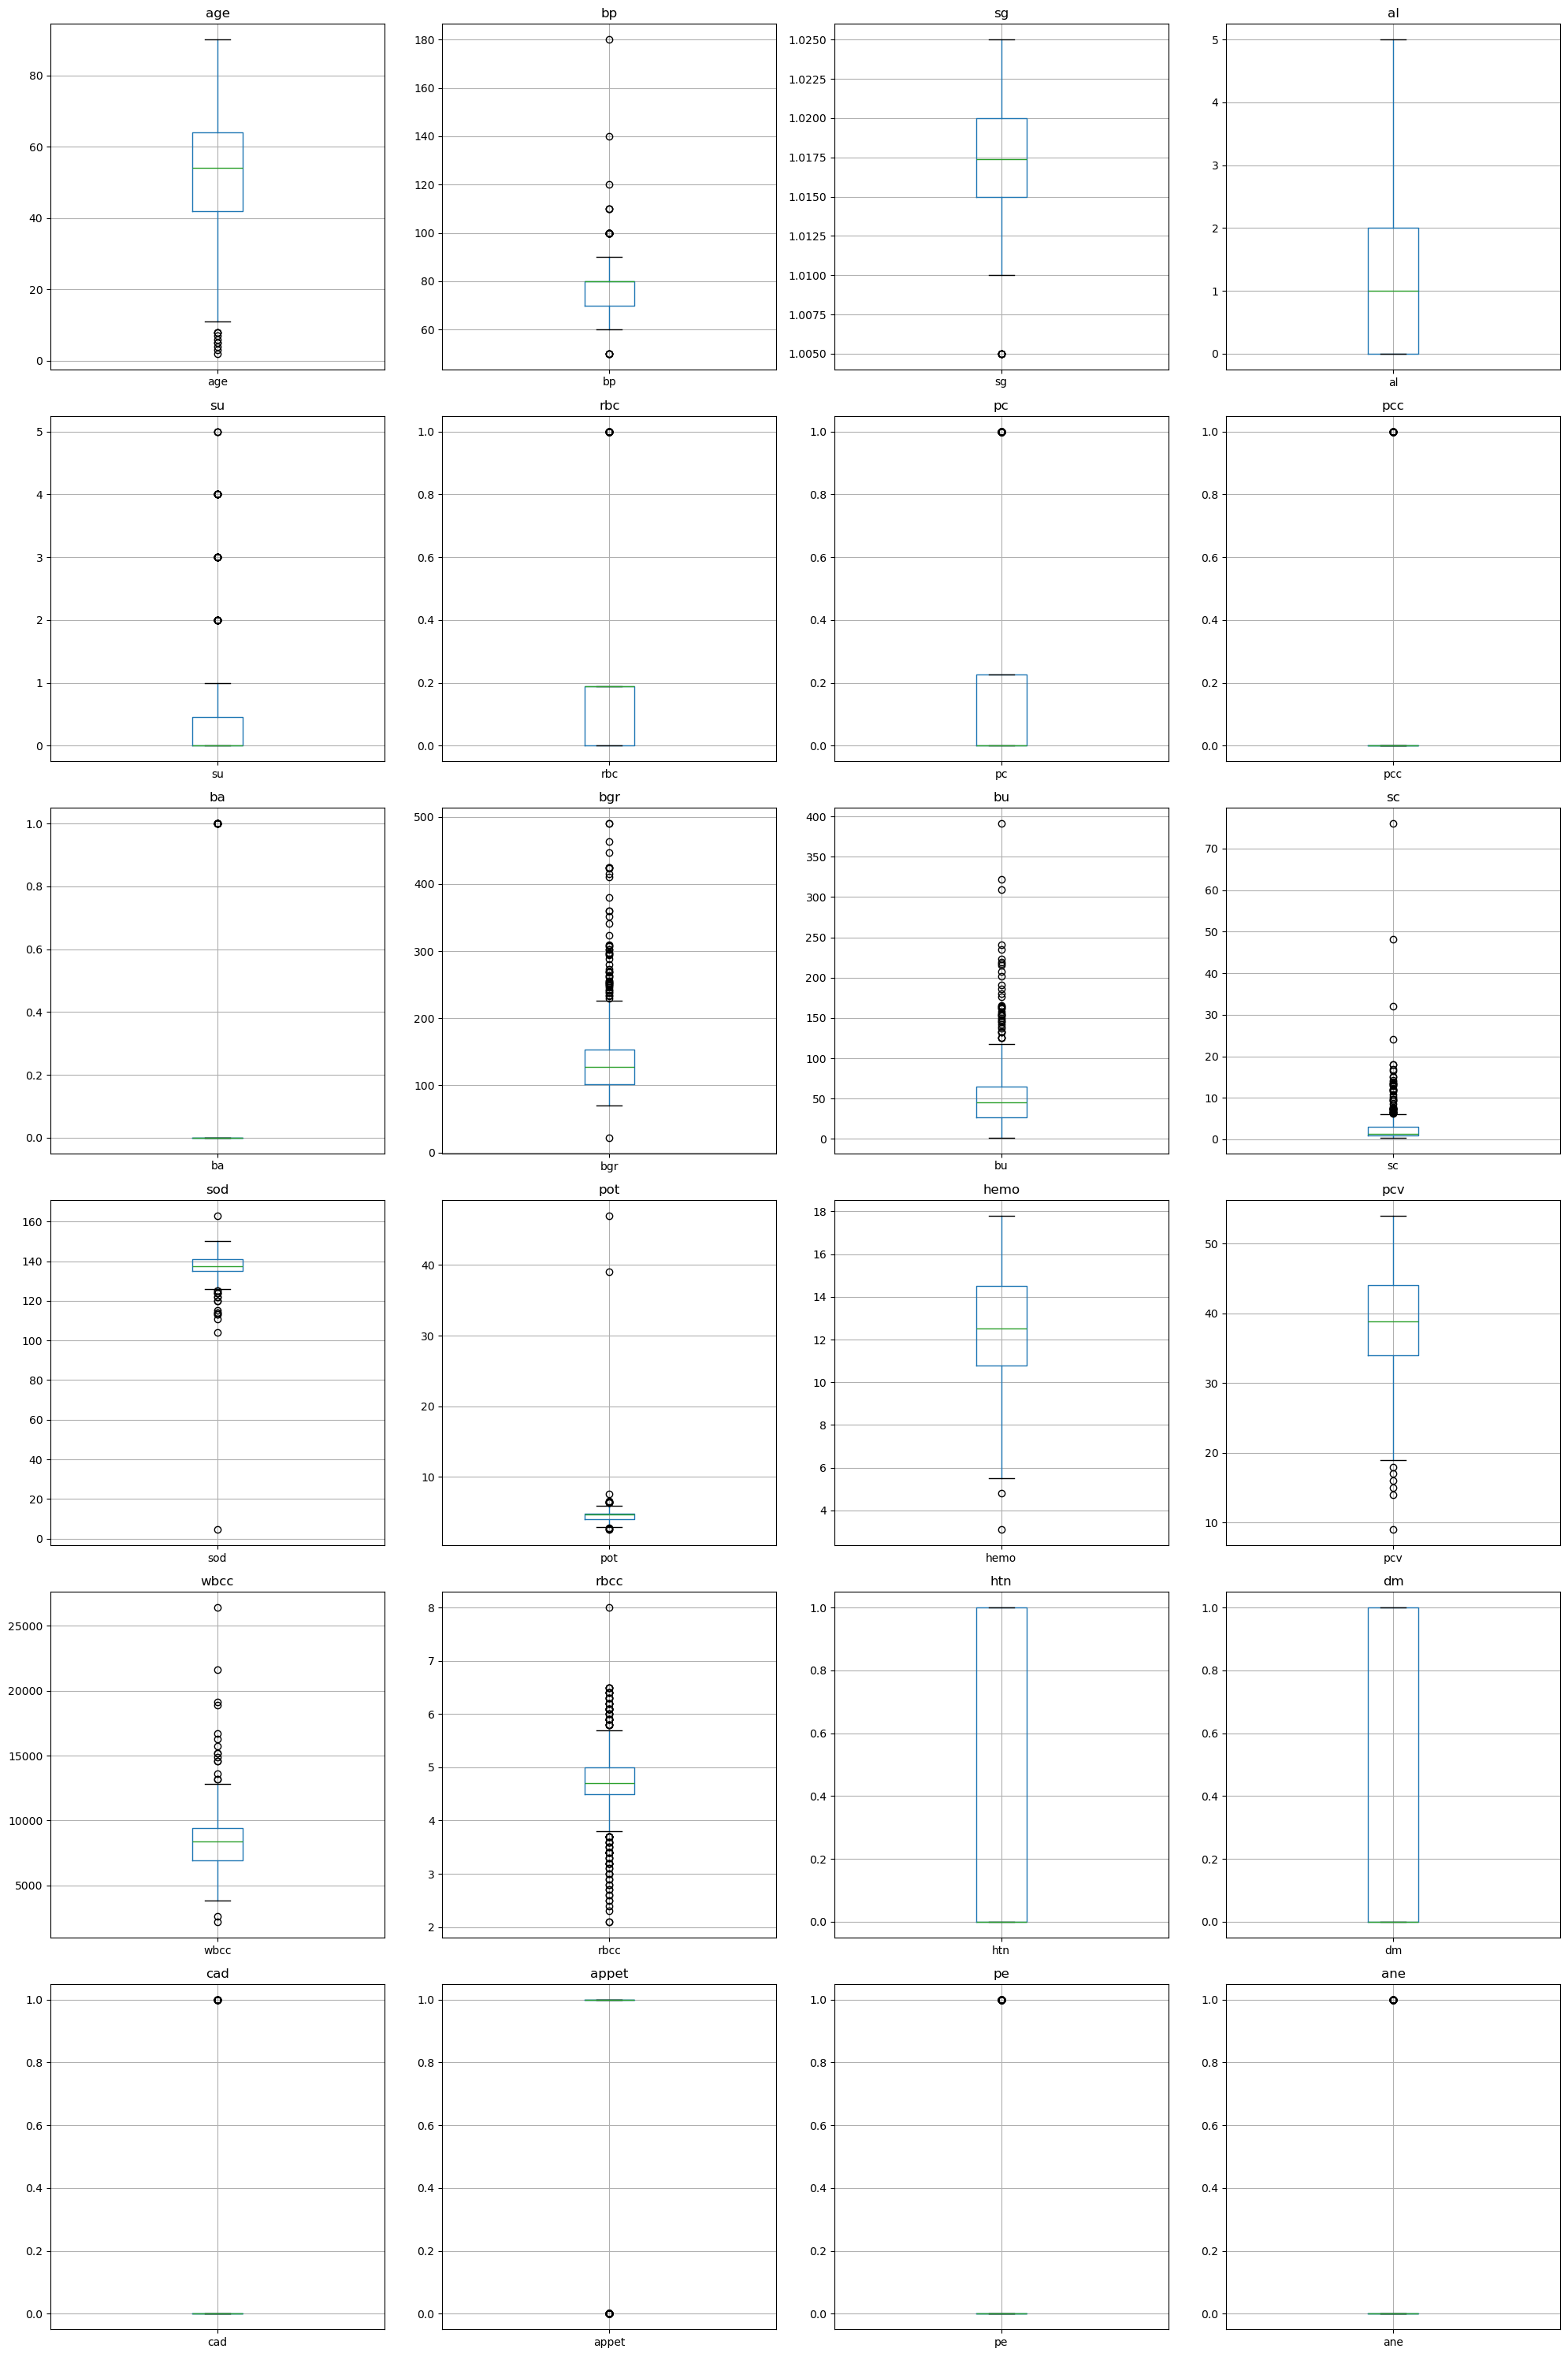

In [179]:
X = df.columns[:-1]
n_cols = 4 
n_rows = (len(X) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 30))
axes = axes.flatten()
for i, column in enumerate(X):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)
for i in range(len(X), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [216]:
df_scaled = scale(df, axis=0)

In [217]:
df1 = pd.DataFrame(df_scaled, columns = df.columns)

In [218]:
outliers = {column: np.sum(df1[column] > 4) for column in df1.columns}
for column, count in outliers.items():
    print(f"'{column}': {count}")


'age': 0
'bp': 2
'sg': 0
'al': 0
'su': 3
'rbc': 0
'pc': 0
'pcc': 0
'ba': 22
'bgr': 3
'bu': 3
'sc': 3
'sod': 0
'pot': 2
'hemo': 0
'pcv': 0
'wbcc': 4
'rbcc': 0
'htn': 0
'dm': 0
'cad': 0
'appet': 0
'pe': 0
'ane': 0
'class': 0


In [219]:
for column in df1.columns:
    df1[column] = np.where(
        np.abs(df1[column]) > 4,  
        np.quantile(df1[column], 0.95),  
        df1[column]  
    )

In [221]:
df1['ba'] = np.where(
    np.abs(df1['ba']) > 4,
    np.quantile(df1['ba'], 0.90),
    df1['ba']
    )

In [222]:
outliers = {column: np.sum(df1[column] > 4) for column in df1.columns}
for column, count in outliers.items():
    print(f"'{column}': {count}")

'age': 0
'bp': 0
'sg': 0
'al': 0
'su': 0
'rbc': 0
'pc': 0
'pcc': 0
'ba': 0
'bgr': 0
'bu': 0
'sc': 0
'sod': 0
'pot': 0
'hemo': 0
'pcv': 0
'wbcc': 0
'rbcc': 0
'htn': 0
'dm': 0
'cad': 0
'appet': 0
'pe': 0
'ane': 0
'class': 0


### 7. Sub-group Analysis

In [324]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
X = df1.drop('class', axis=1)
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X)
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df['cluster'] = clusters

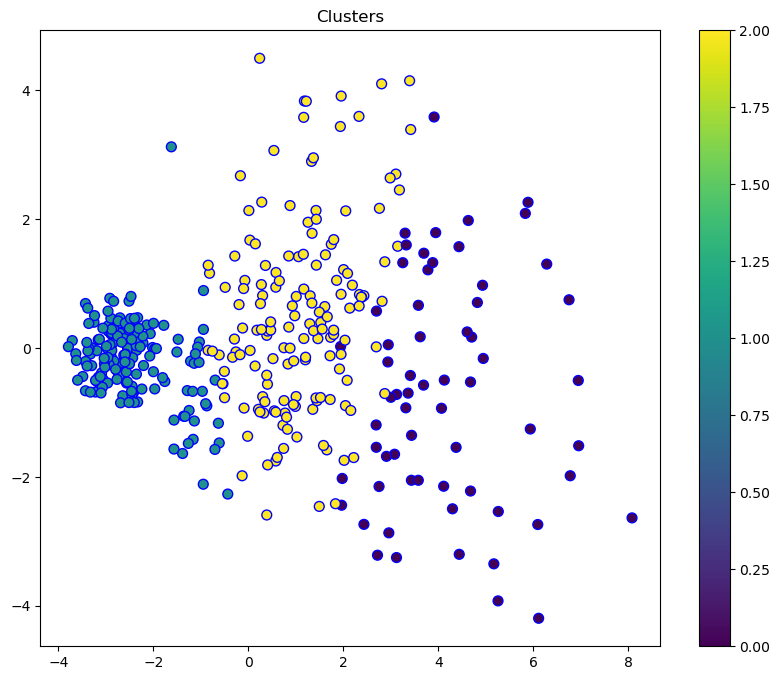

In [236]:

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='b', s=50)
plt.title('Clusters')
plt.colorbar()
plt.show()


### 8. Train-Test Splitting

In [243]:
from sklearn.model_selection import train_test_split

X = df1.drop('class', axis=1)
y = df['class'] # we dont want to use the scaled y for obvious reasons

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 9. Classifier Selection

- As our two classifiers, we will choose logistic regression and a decision tree.

- Logistic regression is ideal for binary outcomes, which is what we have in this dataset (ckd or not ckd). Additionally, logistic regression would provide probabilities for chronic kidney disease risk, which is easy to understand and compare. 

- Decision trees are also easy to interpret and suitable for datasets like this. They are able to capture non-linear relationships between the target variable and the predictor variables.

### 10. Performance Matrix Selection

- Two metrics to compare the performance of the classifiers are accuracy and ROC. 
- Accuracy is a straightforward metric to compare classifiers, although it’s not perfect, especially in datasets with an unbalanced class. 
- An ROC curve is useful for binary classification. 
- A value of 1 indicates a perfect model, and a value of 0.5 suggests the model is no better than randomly guessing.

### 11 & 12. Feature/Selection & Classifier Comparison

In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg_model = LogisticRegression(max_iter=1000, random_state=1)
logreg_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [247]:
from sklearn.metrics import accuracy_score, roc_auc_score

logreg_pred = logreg_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)

logreg_probabilities = logreg_model.predict_proba(X_test)[:, 1]
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]

logreg_accuracy = accuracy_score(y_test, logreg_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

logreg_roc_auc = roc_auc_score(y_test, logreg_probabilities)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_prob)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")
print(f"Logistic Regression ROC AUC: {logreg_roc_auc:.4f}")
print(f"Decision Tree ROC AUC: {decision_tree_roc_auc:.4f}")

Logistic Regression Accuracy: 0.9915
Decision Tree Accuracy: 0.9576
Logistic Regression ROC AUC: 1.0000
Decision Tree ROC AUC: 0.9579


In [309]:
sfs = SFS(
    logreg_model,
    k_features=(1, 24),
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=16
)

In [310]:
sfs = sfs.fit(X_train, y_train)

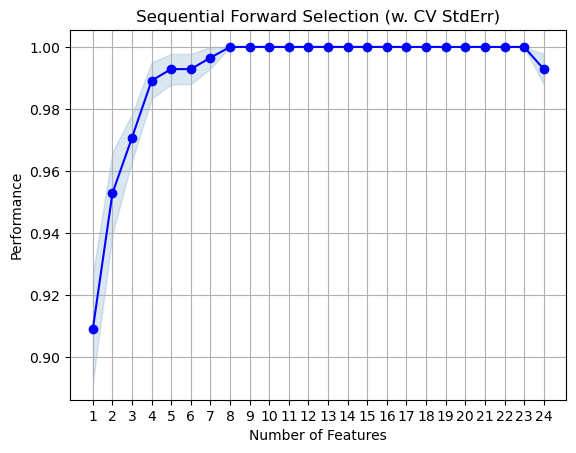

In [311]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [312]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['sg', 'al', 'su', 'sc', 'hemo', 'pcv', 'dm', 'pe'], dtype='object')

In [313]:
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
logreg_model.fit(X_train_sfs, y_train)
sfs_test = logreg_model.predict(X_test_sfs)
sfs_test2 = logreg_model.predict_proba(X_test_sfs)[:, 1]

In [314]:
accuracy_score(y_test, sfs_test)

0.9661016949152542

In [315]:
roc_auc_score(y_test, sfs_test2)

0.9997042295178941

- Based on the accuracy metric, decision tree scores slightly higher than logistic regression. 
- According to ROC, logistic regression is better.

### 13. Model Interpretation 

In [323]:
from sklearn.metrics import r2_score
r_2 = logreg_model.score(X_train, y_train)
print("R^2=:", r_2)

R^2=: 1.0


- The Logistic Regression Model using all the variables explains 100% of the variablity in chronic kidney disease. 

\newpage
# Team Contribution 

#### Susmit Shashwata(400337604):
- Variable Transformation
- Missing Value Analysis and Handling
- Outlier Analysis
- Sub-group Analysis
- Feature Selection
- Parts of Classifier Comparison
- Classifier Interpretation


#### Marco Laruffa(400328613)
- Problem Identification
- Dataset Overview
- Association Between Variables
- Data Splitting
- Classifier Choices
- Peformance Matrix
- Parts of Classifier Comparson